In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#Dataset

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
#image

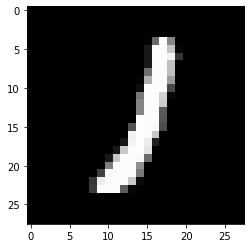

In [ ]:
s1 = X_train[15999,:,:]
plt.imshow(s1,cmap='gray')

In [ ]:
!nvidia-smi

Thu Feb 17 13:40:35 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
print(s1.min(),s1.max())

0 255


In [ ]:
print(y_train[15999])

1


In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train= to_categorical(y_train , dtype='uint8')
y_test = to_categorical(y_test , dtype ='uint8')

In [ ]:
#Reshaping

In [ ]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [ ]:
#Normalising

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
# normalize to range 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
#Model setup

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(54, activation='relu'))
model.add(Dense(51, activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 54)                292086    
                                                                 
 dense_1 (Dense)             (None, 51)                2805      
                                                                 
 dense_2 (Dense)             (None, 10)                520       
                                                        

In [ ]:
#Training

In [ ]:
import tensorflow as tf


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=0.01), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
hist = model.fit(x = X_train, y = y_train, batch_size=25, validation_data=(X_test,y_test), epochs=35,verbose=1)

Epoch 1/35
2400/2400 [==============================] - 21s 5ms/step - loss: 0.4928 - accuracy: 0.8610 - val_loss: 0.2371 - val_accuracy: 0.9283
Epoch 2/35
2400/2400 [==============================] - 11s 5ms/step - loss: 0.2216 - accuracy: 0.9339 - val_loss: 0.1810 - val_accuracy: 0.9461
Epoch 3/35
2400/2400 [==============================] - 11s 5ms/step - loss: 0.1719 - accuracy: 0.9486 - val_loss: 0.1567 - val_accuracy: 0.9492
Epoch 4/35
2400/2400 [==============================] - 12s 5ms/step - loss: 0.1414 - accuracy: 0.9563 - val_loss: 0.1324 - val_accuracy: 0.9593
Epoch 5/35
2400/2400 [==============================] - 11s 5ms/step - loss: 0.1214 - accuracy: 0.9629 - val_loss: 0.1173 - val_accuracy: 0.9656
Epoch 6/35
2400/2400 [==============================] - 11s 5ms/step - loss: 0.1076 - accuracy: 0.9669 - val_loss: 0.1120 - val_accuracy: 0.9679
Epoch 7/35
2400/2400 [==============================] - 11s 5ms/step - loss: 0.0949 - accuracy: 0.9700 - val_loss: 0.0972 - val_ac

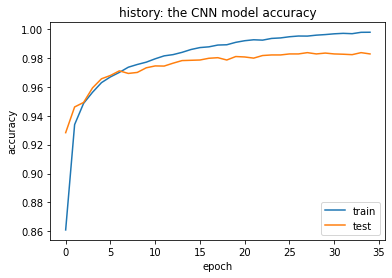

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('history: the CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [ ]:
model.save_weights('CNN_mnist.h5')